# Co-drying of methanol and toluol from poly-(vinylacetate)

This jupyter notebook models the co-drying of two solvents from a polymer to demonstrate the power of the Stefan-Maxwell diffusion model.
First we import the diffusion model and the pc-saft implementation from diffusionpy

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,vpure,dlnai_dlnxi,D_Matrix,Diffusion_MS_iter
import matplotlib.pyplot as plt

The experimental data for this example was taken from Schabel et al. 2006 (https://doi.org/10.1016/j.ces.2006.12.062)

In [2]:
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])

wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])

wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])

wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

The drying starts from a mixture of methanol-toloul-PVAc in equal parts. We define the temperature, the presssure, the number of components, their molar mass and the starting and equilibrium weight fractions.

In [3]:
T=298.15
p=1E5
nc=3 # number of components
L=2.32E-5 # estimated thickness of the film
wi0=np.asarray([0.333333333,0.333333333,0.333333333]) # Weight fractions of the components methanol, toluol and PVAc at t=0
wi8=np.asarray([0.00001,0.127606346,0.872393654]) # Weight fractions of the components methanol, toluol and PVAc at t=8.T
Mi=np.asarray([32.04,92.14,90000.])

For describing the diffusion in the mixture, a matrix of diffusion coefficients needs to be defined. The matrix for a ternary system is displayed below:


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
Ð_{21} & 0 & Ð_{23} \\ 
Ð_{31} & Ð_{32} & 0 \\ 
\end{array}\right]$

where $\hat{Ð}$ is the matrix of diffusion coefficients and $Ð_{ij}$ are the binary diffusion coefficients of component i moving in j. Friction between the same species is not required, thus $Ð_{ii}=0$  
Furthermore, the Stefan-Maxwell diffusion coefficients used in diffusionpy retain a convenient property where each pair of binary diffusion coefficients is symmetric i.e $Ð_{ij}=Ð_{ji}$

Thus, for describing the diffusion in a ternary system, only three binary diffusion coefficients need to be defined:

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

which is stored as a vector of length $\frac{n_c(1-n_c)}{2}$ with $n_c$ being the number of components

In [4]:
Dvec=np.asarray([1E-5,2.3E-10,1E-10])
Dvec=np.asarray([1E-6,2.3E-11,1.7E-11])

Diffusionpy internally caclulates the matrix $\hat{Ð}$ using the D_Matrix functionality

In [5]:
Dmat=D_Matrix(Dvec,nc)

Lastly, one needs to specify which components is considered mobile and which immobile. In our case, the solvents are obviously mobile while the polymer can be considered immobile due to its large molar mass which is conveniently defined as a boolean array.

In [6]:
mobile=np.asarray([True,True,False])

Finally, we can model solvent desorption and plot the results

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1245166 seconds ----------------


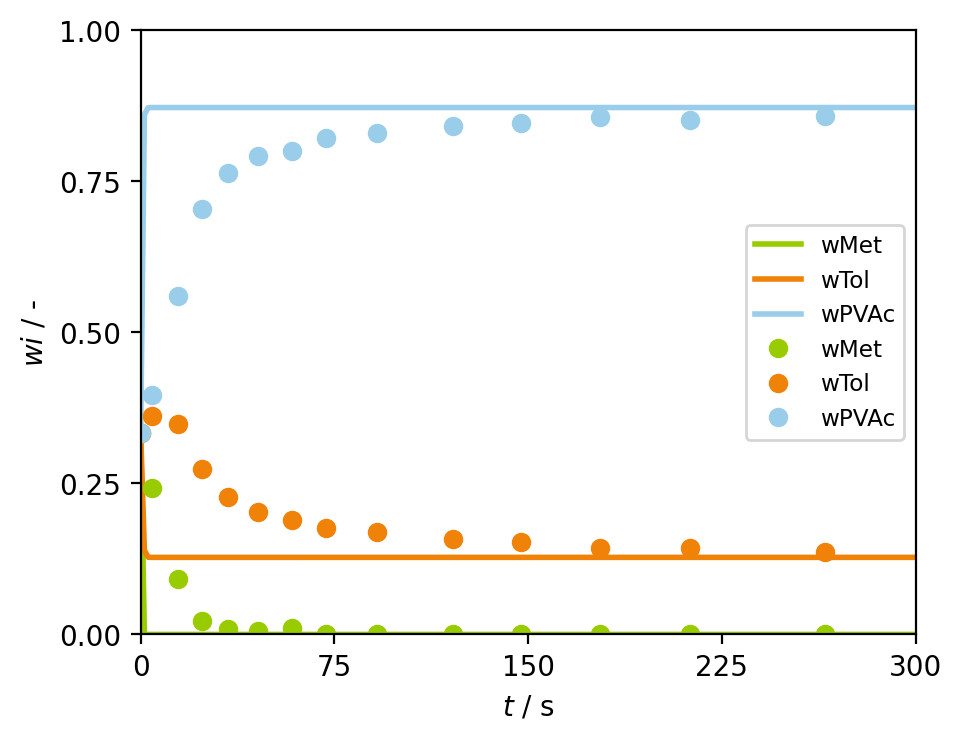

In [7]:
nt=300
t=np.linspace(0,texp[-1],nt)
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile)



font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(t,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(t,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPVAc")

ax.plot(texp,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(texp,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(texp,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "wPVAc")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()

diffusionpy neglects non-idealities for the default case. diffusionpy considers non-idealities when used in conjunction with a thermodynamic model. 
diffusionpy is prepackaged with an implementation of the pc-saft equation of state. 
PC-SAFT parameteters can be defined as follows:

In [8]:
kij=D_Matrix(np.asarray([0.029,-0.05855362,0.027776682]),nc)
par={"mi":np.asarray([1.5255, 2.8149, 2889.9]),
"si": np.asarray([3.2300, 3.7169, 3.3972]),
"ui" :np.asarray([188.9, 285.69, 204.65]),
"eAi" :np.asarray([2899.5, 0., 0.]),
"kAi":np.asarray([0.035176, 0., 0.]),
"NAi":np.asarray([1., 0., 1047.]),
"Mi": Mi,
"kij":kij}


However, any other implementatation of any thermodyamic model can be used in conjucntion with diffusionpy. 
This is because, diffusionpy relies soley on the numerical values of second derivative of activities $a_i$ or fugacities $f_i$ of component i. 

$\frac{Dlna_i}{Dlnx_i}$ = $\frac{Dlnf_i}{Dlnx_i}$ , where $D$ denotes that the differentiation was performed while neglecting the mass balance.

The nonidealities employed in an iterative fashion and are supplied for each time point for the current weight fraction -time matrix. Here, the ideal solution from before gives the initial point for the iteration. 

In [9]:
vpures=vpure(p,T,**par)
par["vpure"]=vpures
nonidealities=np.asarray([dlnai_dlnxi(T,wt[i,:],**par) for i in range(nt)]).T
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,Gammai=nonidealities)

for i in range(10):
    Gammai=np.asarray([dlnai_dlnxi(T,np.ascontiguousarray(wt[i,:]),**par) for i in range(nt)]).T
    wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,Gammai=Gammai)


------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1160757 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1430459 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1660993 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2276582 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1862249 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1647622 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1741347 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1

In esssence, the iteration was performed by using a simple fixed point iteration. 
Alternativly, if one uses the built-in PC-SAFt implementation, diffusiopy offers a more sophisticated functioniality for this iteration based the df-sane algoirthm.

In [10]:
wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,T=T,par=par)

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1126376 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1480173 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1512215 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1351426 seconds ----------------
------------- Start diffusion modeling ----------------


We plot the results

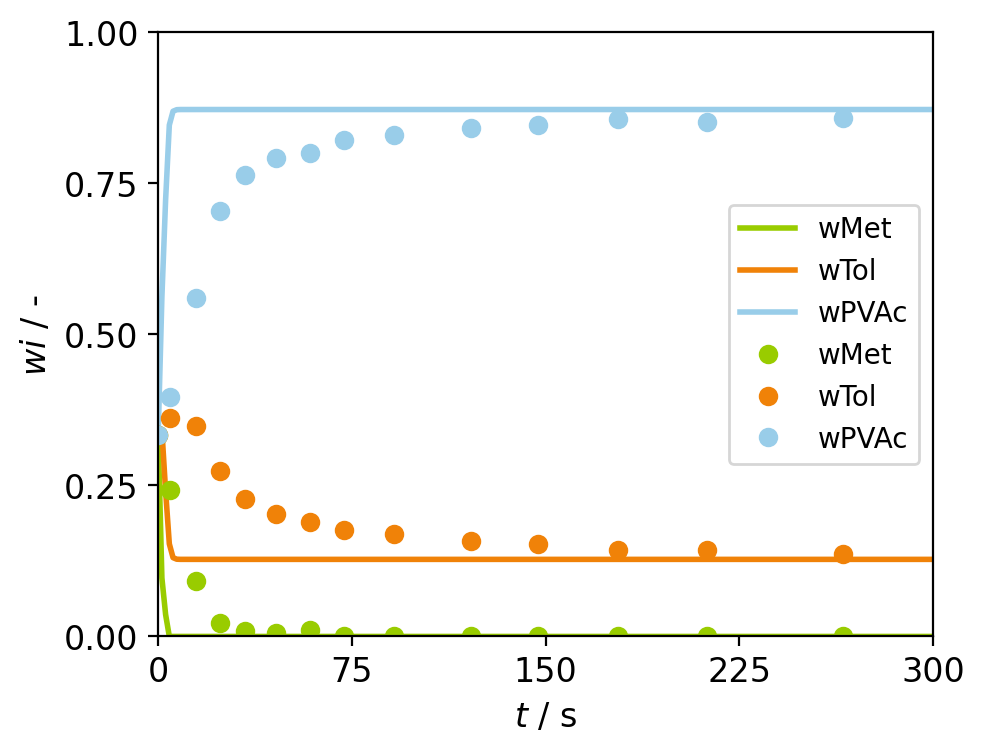

In [ ]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(t,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(t,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPVAc")

ax.plot(texp,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(texp,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(texp,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "wPVAc")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()